# Malaria in Africa

### 1. Cleaning the dataset

INTRODUCTION
Malaria, a vector-borne disease caused by parasites of the Plasmodium species, continues to pose a significant health challenge in many parts of the world, particularly in sub-Saharan Africa. As part of ongoing efforts to combat and mitigate the impact of malaria, a detailed dataset has been compiled, encompassing a diverse array of factors and indicators related to malaria incidence and prevention, water and sanitation services, population demographics, and geographical coordinates.

The "Malaria in Africa" dataset offers a comprehensive snapshot of the malaria landscape across various African countries, shedding light on the dynamics of the disease's prevalence and its interplay with broader socio-economic and environmental factors. This dataset encompasses a range of essential variables, including:

Country Name: The name of the African country under consideration.
Year: The specific year for which the data is recorded.
Country Code: A unique code assigned to each country for identification.
Incidence of Malaria: The number of malaria cases reported per 1,000 population at risk.
Malaria Cases Reported: The total reported cases of malaria in the given year and country.
Use of Insecticide-Treated Bed Nets: The percentage of the under-5 population using insecticide-treated bed nets for protection against malaria.
Children with Fever Receiving Antimalarial Drugs: The percentage of children under the age of 5, diagnosed with fever, who received antimalarial drugs.
Intermittent Preventive Treatment (IPT) of Malaria in Pregnancy: The percentage of pregnant women who received intermittent preventive treatment for malaria.
People Using Safely Managed Drinking Water Services: The percentage of the population with access to safely managed drinking water services.
Safely Managed Drinking Water Services (Rural and Urban): The percentage of rural and urban populations with access to safe drinking water services.
Safely Managed Sanitation Services: The percentage of the population with access to safely managed sanitation facilities.
Safely Managed Sanitation Services (Rural and Urban): The percentage of rural and urban populations with access to safe sanitation services.
Rural Population (% and Growth): The percentage and annual growth rate of the rural population in relation to the total population.
Urban Population (% and Growth): The percentage and annual growth rate of the urban population in relation to the total population.
People Using at Least Basic Drinking Water Services: The percentage of the population with access to basic drinking water services.
Basic Drinking Water Services (Rural and Urban): The percentage of rural and urban populations with access to basic drinking water services.
People Using at Least Basic Sanitation Services: The percentage of the population with access to basic sanitation facilities.
Basic Sanitation Services (Rural and Urban): The percentage of rural and urban populations with access to basic sanitation services.
Latitude and Longitude: Geographical coordinates specifying the location of the data point.
Geometry: Geometric representation of the data point.

![Alt Text](malaria.jpeg)


Ssemwogerere Trevor Simon 21/U/13093/PS

In [2]:
# Ssemwogerere Trevor Simon 21/U/13093/PS

#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
from fancyimpute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

(CVXPY) Aug 11 08:57:08 AM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Aug 11 08:57:08 AM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Aug 11 08:57:08 AM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: The specified module could not be found.')


OBJECTIVES:
Objective 1: Study the Countries with the Highest Number of Malaria Cases per Annum
Objective 2:Study the Countries with the highest number of malaria cases.
Objective 3:A Map to show the countries affected with malaria.
Analyze and identify the countries with the highest annual count of malaria cases.
Utilize the "Malaria cases reported" column to determine the countries that consistently report the most cases each year.
Objective 3: Investigate the Impact of Safely Managed Drinking Water on Malaria Cases
Examine the relationship between "People using safely managed drinking water services" and the "Malaria cases reported per Year" column.
Explore whether countries with higher access to safely managed drinking water services tend to have lower reported malaria cases.
Objective 4: Explore the Link between Safely Managed Sanitation and Malaria Incidence
Study the correlation between "People using safely managed sanitation services" and "Incidence of malaria (per 1,000 population at risk)."
Determine whether countries with better sanitation services experience lower malaria incidence rates.
Objective 5: Analyze the Influence of Population Growth on Malaria Incidence
Investigate how variations in population growth rates affect the "Incidence of malaria (per 1,000 population at risk)" column.
Examine whether countries with higher population growth rates tend to experience different levels of malaria incidence.


In [3]:
# Load the data percentage of missing values and number of blanks
df = pd.read_csv("MalariaAfricaDataset.csv")

total_rows = df.shape[0]
missing_percentages = df.isnull().sum() / total_rows * 100
number_of_blanks = df.isnull().sum()

print("Percentage of missing values:")
print(missing_percentages)

print("\nNumber of blanks:")
print(number_of_blanks)


Percentage of missing values:
Country Name                                                                                0.000000
Year                                                                                        0.000000
Country Code                                                                                0.000000
Incidence of malaria (per 1,000 population at risk)                                         7.407407
Malaria cases reported                                                                      7.407407
Use of insecticide-treated bed nets (% of under-5 population)                              77.777778
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    79.461279
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      82.154882
People using safely managed drinking water services (% of population)                      83.333333
People using safely managed drinking water services, rural (%


Normalized DataFrame:


c:\Users\TrevorSimon\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Incidence of malaria,Malaria cases reported,insecticide-treated bed nets,Children with fever receiving antimalarial drugs,IPT,drinking water services,drinking water services rural,drinking water services urban,managed sanitation services,sanitation services rural,...,Rural population,Rural population growth,Urban population,urban population growth,basic drinking water services,basic drinking water services rural,basic drinking water services urban,basic sanitation services,basic sanitation services rural,basic sanitation services urban
0,0.257181,0.314625,0.460139,0.125561,0.130626,0.504190,0.691103,0.397377,0.195796,0.257073,...,0.298660,0.270398,0.701340,0.610788,0.884501,0.830877,0.892716,0.851068,0.648694,0.909823
1,0.620909,0.377105,0.179894,0.498011,0.025168,0.387612,0.348099,0.332750,0.303195,0.175205,...,0.397624,0.508539,0.602376,0.801660,0.267945,0.081179,0.288458,0.339648,0.104673,0.488334
2,0.866414,0.314624,0.412996,0.730678,0.316283,0.224012,0.087434,0.347019,0.341216,0.344055,...,0.599343,0.516129,0.400657,0.725311,0.491045,0.457478,0.505740,0.071677,0.020744,0.114092
3,0.258475,0.314640,0.285913,0.166698,0.190906,0.811954,0.691595,0.678859,0.380676,0.239155,...,0.392442,0.190702,0.607558,0.784232,0.704132,0.489853,0.883740,0.595832,0.329317,0.755016
4,0.896302,0.316427,0.363303,0.677533,0.232870,0.172261,0.139209,0.315405,0.282623,0.216509,...,0.833923,0.532258,0.166077,0.876349,0.328727,0.339212,0.503861,0.111672,0.038809,0.395590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.610100,0.386155,0.726984,0.511866,0.699664,0.343201,0.113573,0.512146,0.316964,0.288618,...,0.604398,0.477230,0.395602,0.700415,0.510083,0.378594,0.773325,0.117251,0.047626,0.187004
590,0.177941,0.019156,0.181025,0.025846,0.084790,1.000000,0.316281,1.000000,1.000000,1.000000,...,0.257078,0.346300,0.742922,0.516183,0.948949,0.865668,0.995408,0.904431,0.686812,0.964886
591,0.684391,0.790029,0.707984,0.799068,0.430617,0.115030,0.085068,0.276055,0.325954,0.301782,...,0.831395,0.612903,0.168605,0.904564,0.284022,0.292341,0.482154,0.141880,0.123429,0.157839
592,0.460212,0.538951,0.512294,0.524498,0.325952,0.457913,0.315440,0.456332,0.298576,0.279951,...,0.581395,0.518027,0.418605,0.735270,0.437174,0.300797,0.664788,0.225029,0.147285,0.276015


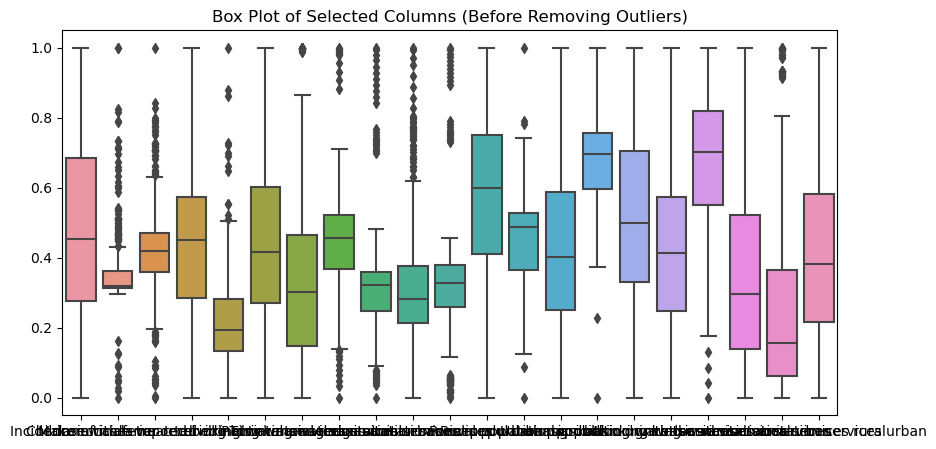


Outliers_removed DataFrame:


,Incidence of malaria,Malaria cases reported,insecticide-treated bed nets,Children with fever receiving antimalarial drugs,IPT,drinking water services,drinking water services rural,drinking water services urban,managed sanitation services,sanitation services rural,...,Rural population,Rural population growth,Urban population,urban population growth,basic drinking water services,basic drinking water services rural,basic drinking water services urban,basic sanitation services,basic sanitation services rural,basic sanitation services urban
0,0.257181,0.314625,0.460139,0.125561,0.130626,0.504190,0.691103,0.397377,0.195796,0.257073,...,0.298660,0.270398,0.701340,0.610788,0.884501,0.830877,0.892716,0.851068,0.648694,0.909823
2,0.866414,0.314624,0.412996,0.730678,0.316283,0.224012,0.087434,0.347019,0.341216,0.344055,...,0.599343,0.516129,0.400657,0.725311,0.491045,0.457478,0.505740,0.071677,0.020744,0.114092
3,0.258475,0.314640,0.285913,0.166698,0.190906,0.811954,0.691595,0.678859,0.380676,0.239155,...,0.392442,0.190702,0.607558,0.784232,0.704132,0.489853,0.883740,0.595832,0.329317,0.755016
4,0.896302,0.316427,0.363303,0.677533,0.232870,0.172261,0.139209,0.315405,0.282623,0.216509,...,0.833923,0.532258,0.166077,0.876349,0.328727,0.339212,0.503861,0.111672,0.038809,0.395590
5,0.539971,0.359510,0.463860,0.438035,0.134496,0.440297,0.224320,0.554575,0.447773,0.616588,...,1.000000,0.613852,0.000000,0.868880,0.363418,0.414835,0.693592,0.430692,0.383512,0.352310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.719113,0.381903,0.619048,0.681155,0.449664,0.144498,0.135469,0.254930,0.130122,0.116450,...,0.598332,0.465844,0.401668,0.646473,0.449161,0.399734,0.495721,0.112199,0.057306,0.152473
584,0.304272,0.316055,0.356813,0.297891,0.073536,0.353074,0.421123,0.374516,0.220383,0.090271,...,0.563574,0.496205,0.436426,0.726971,0.331124,0.133607,0.644959,0.351016,0.157917,0.566029
585,0.262179,0.315541,0.327295,0.124187,0.200868,0.973656,0.864520,0.666585,0.343910,0.385997,...,0.292341,0.320683,0.707659,0.566805,0.898604,0.768664,0.978710,0.744764,0.629073,0.743467
587,0.316477,0.343996,0.464780,0.445627,0.116993,0.242527,0.351995,0.219845,0.226287,0.164155,...,0.690217,0.518975,0.309783,0.644813,0.441546,0.436700,0.453976,0.332491,0.193096,0.554830



Percentage of Missing Values in Normalized DataFrame:
Incidence of malaria                                0.0
Malaria cases reported                              0.0
insecticide-treated bed nets                        0.0
Children with fever receiving antimalarial drugs    0.0
IPT                                                 0.0
drinking water services                             0.0
drinking water services rural                       0.0
drinking water services urban                       0.0
managed sanitation services                         0.0
sanitation services rural                           0.0
sanitation services urban                           0.0
Rural population                                    0.0
Rural population growth                             0.0
Urban population                                    0.0
urban population growth                             0.0
basic drinking water services                       0.0
basic drinking water services rural              

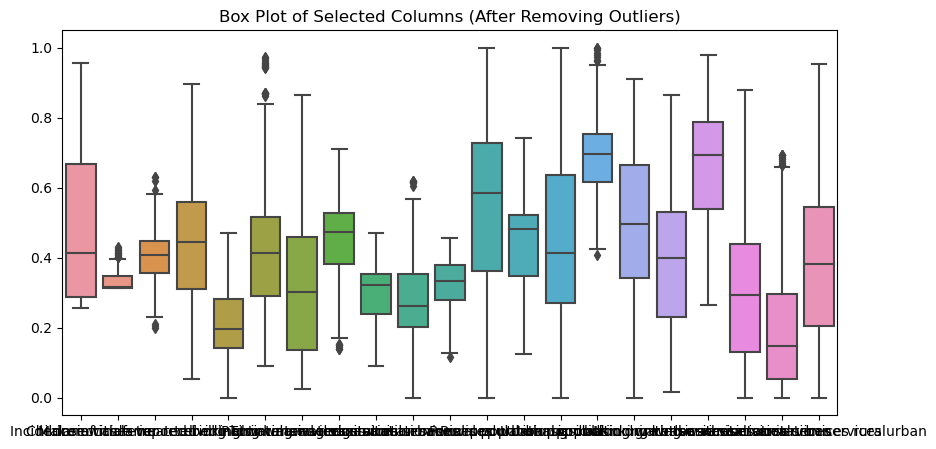

In [4]:
# Extract columns of interest with high percentages of missing data
columns_of_interest = ["Use of insecticide-treated bed nets (% of under-5 population)",
                       "Children with fever receiving antimalarial drugs (% of children under age 5 with fever)",
                       "Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)",
                       "People using safely managed drinking water services (% of population)",
                       "People using safely managed drinking water services, rural (% of rural population)",
                       "People using safely managed drinking water services, urban (% of urban population)",
                       "People using safely managed sanitation services (% of population)",
                       "People using safely managed sanitation services, rural (% of rural population)",
                       "People using safely managed sanitation services, urban  (% of urban population)"]

# Prepare the data for multiple imputation (exclude non-numeric columns)
numeric_values = df.drop(["Country Name", "Year", "Country Code", "geometry"], axis=1)

# Perform multiple imputation using IterativeImputer
imputer = IterativeImputer()
imputed_values = imputer.fit_transform(numeric_values)

# Convert the imputed array back to a DataFrame
df_imputed = pd.DataFrame(imputed_values, columns=numeric_values.columns)

# Merge the imputed numeric values with the non-numeric columns
non_numeric = df[["Country Name", "Year", "Country Code", "geometry", "latitude", "longitude"]]
df_combined = pd.concat([non_numeric, df_imputed], axis=1)


# Normalize the selected columns using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_combined.drop(["Country Name", "Year", "Country Code", "geometry", "latitude", "longitude"], axis=1))

# Convert the normalized_data array back to a DataFrame with column names
normalized_df = pd.DataFrame(normalized_data, columns=["Incidence of malaria","Malaria cases reported","insecticide-treated bed nets","Children with fever receiving antimalarial drugs","IPT","drinking water services","drinking water services rural","drinking water services urban","managed sanitation services","sanitation services rural","sanitation services urban","Rural population","Rural population growth","Urban population","urban population growth","basic drinking water services","basic drinking water services rural","basic drinking water services urban","basic sanitation services","basic sanitation services rural","basic sanitation services urban"])

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
display(normalized_df)

# Create a box plot to identify outliers using IQR method
plt.figure(figsize=(10, 5))
sns.boxplot(data=normalized_df)
plt.title('Box Plot of Selected Columns (Before Removing Outliers)')
plt.show()

# Remove outliers using IQR (Interquartile Range) method
Q1 = normalized_df.quantile(0.25)
Q3 = normalized_df.quantile(0.75)
IQR = Q3 - Q1
outliers_removed = normalized_df[~((normalized_df < (Q1 - 1.5 * IQR)) | (normalized_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df = pd.concat([non_numeric, normalized_df], axis=1)

# Display the outliers_removed DataFrame
print("\nOutliers_removed DataFrame:")
display(outliers_removed)


# Recalculate the percentage of missing values in the normalized DataFrame
missing_percentage = (normalized_df.isnull().sum() / normalized_df.shape[0]) * 100

# Print the percentage of missing values for each column
print("\nPercentage of Missing Values in Normalized DataFrame:")
print(missing_percentage)


# Create a box plot after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=outliers_removed)
plt.title('Box Plot of Selected Columns (After Removing Outliers)')
plt.show()


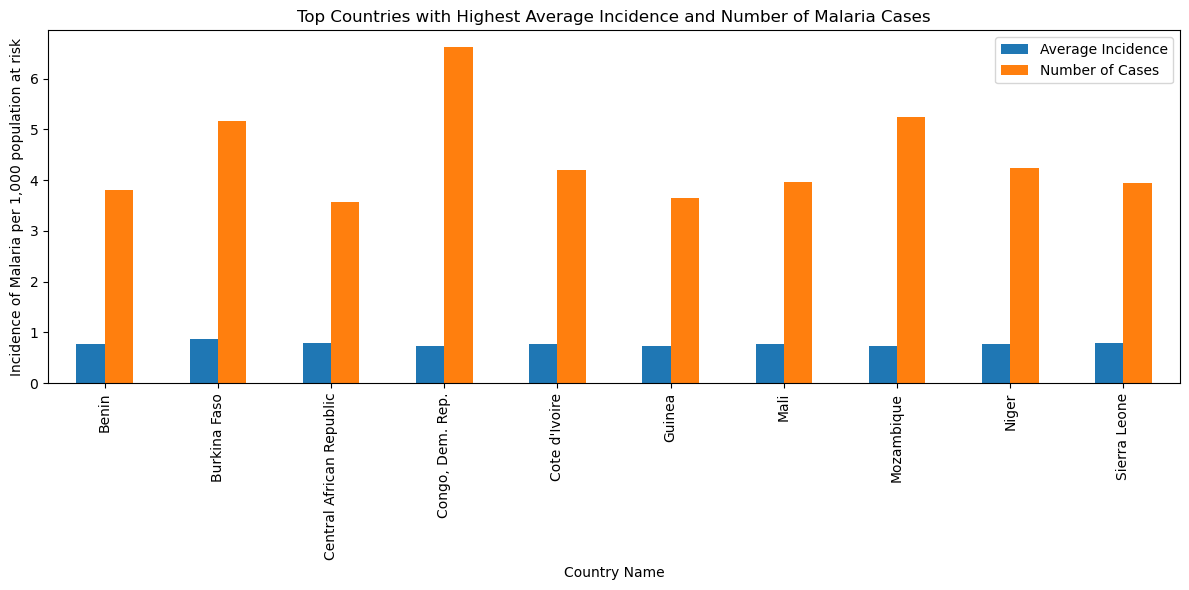

In [8]:
# Group the data by country and calculate the average incidence of malaria cases
average_incidence_by_country = df.groupby("Country Name")["Incidence of malaria"].mean()

# Sort the countries based on the average incidence in descending order
sorted_countries = average_incidence_by_country.sort_values(ascending=False)

# Select the top N countries with the highest average incidence (you can adjust N as needed)
top_countries = sorted_countries.head(10)

# Get the number of malaria cases for the top countries
number_of_cases_by_country = df[df["Country Name"].isin(top_countries.index)]
number_of_cases_by_country = number_of_cases_by_country.groupby("Country Name")["Malaria cases reported"].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'Average Incidence': average_incidence_by_country[top_countries.index],
    'Number of Cases': number_of_cases_by_country
})

# Visualize the top countries with the highest average incidence and their corresponding number of malaria cases
plt.figure(figsize=(12, 6))
plot_data.plot(kind='bar', ax=plt.gca())
plt.xlabel('Country Name')
plt.ylabel('Incidence of Malaria per 1,000 population at risk')
plt.title('Top Countries with Highest Average Incidence and Number of Malaria Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Get the latitude and longitude for each country
country_coordinates = df[df["Country Name"].isin(top_countries.index)][["Country Name", "latitude", "longitude"]]
country_coordinates = country_coordinates.drop_duplicates("Country Name")

# Create the map
map_center = [country_coordinates["latitude"].mean(), country_coordinates["longitude"].mean()]
malaria_map = folium.Map(location=map_center, zoom_start=3)

# Add markers for each country
for index, row in country_coordinates.iterrows():
    country_name = row["Country Name"]
    latitude = row["latitude"]
    longitude = row["longitude"]
    incidence = top_countries[country_name]

    popup_text = f"{country_name}<br>Average Incidence: {incidence:.2f}"
    folium.Marker(location=[latitude, longitude], popup=popup_text).add_to(malaria_map)

# Display the map
malaria_map

Mean Squared Error: 0.0019821064204934213
Correlation coefficient: 0.9876062511751126


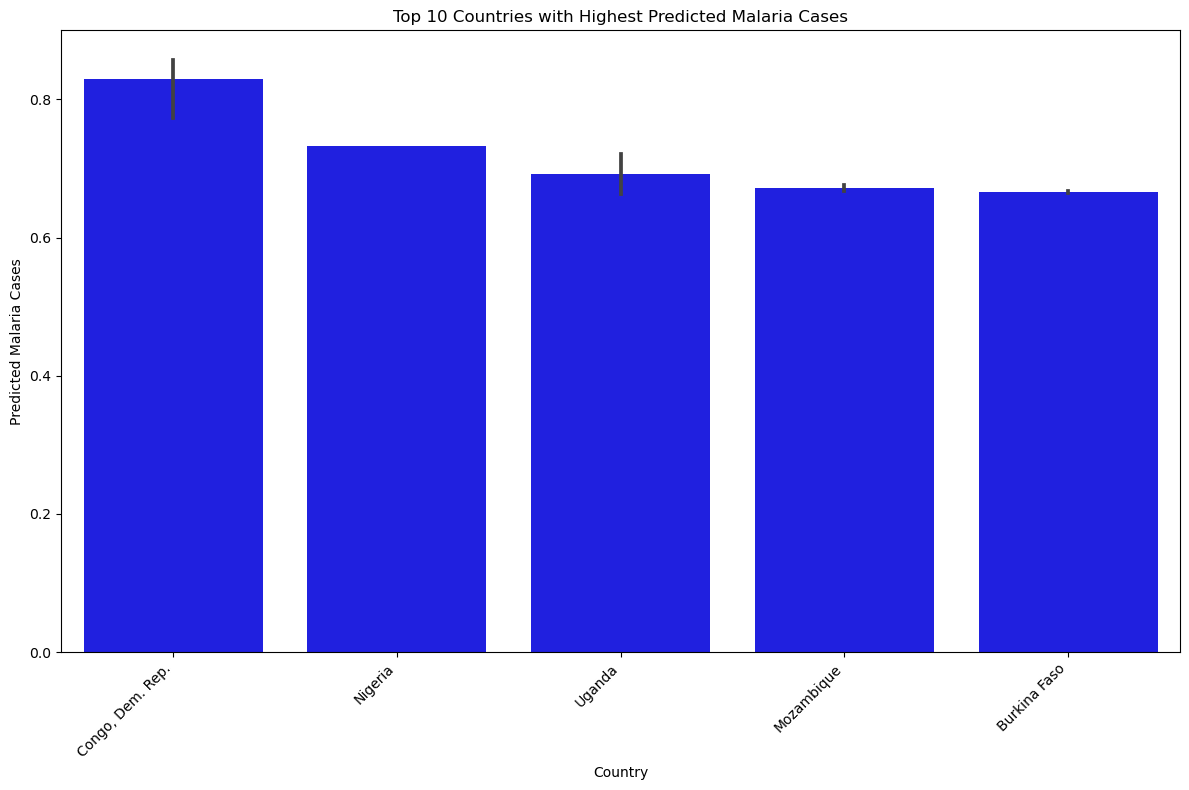

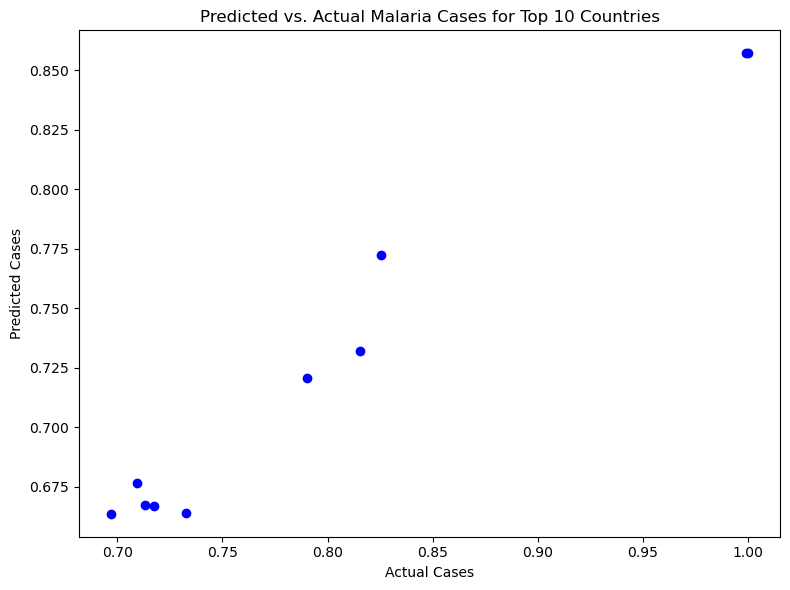

,Country Name,Year,Country Code,geometry,latitude,longitude,Incidence of malaria,Malaria cases reported,insecticide-treated bed nets,Children with fever receiving antimalarial drugs,...,Urban population,urban population growth,basic drinking water services,basic drinking water services rural,basic drinking water services urban,basic sanitation services,basic sanitation services rural,basic sanitation services urban,Predicted Malaria Cases,Population annual growth
497,"Congo, Dem. Rep.",2016,COD,POINT (-4.038333 21.758664),-4.038333,21.758664,0.666643,1.000000,0.794304,0.836813,...,0.422776,0.767635,0.197715,0.069824,0.361929,0.162509,0.140716,0.125992,0.857172,0.656113
551,"Congo, Dem. Rep.",2017,COD,POINT (-4.038333 21.758664),-4.038333,21.758664,0.674711,0.998854,0.791883,0.838918,...,0.429980,0.765145,0.201382,0.069824,0.361929,0.162825,0.140716,0.125992,0.857172,0.652497
443,"Congo, Dem. Rep.",2015,COD,POINT (-4.038333 21.758664),-4.038333,21.758664,0.648958,0.825517,0.689738,0.764273,...,0.415571,0.769295,0.189395,0.063904,0.360050,0.162614,0.141667,0.125408,0.772433,0.658841
524,Nigeria,2016,NGA,POINT (9.081999 8.675276999999999),9.081999,8.675277,0.614134,0.815535,0.716470,0.677919,...,0.490647,0.749378,0.579185,0.450592,0.720935,0.351752,0.248155,0.397457,0.732107,0.585315
591,Uganda,2017,UGA,POINT (1.373333 32.290275),1.373333,32.290275,0.684391,0.790029,0.707984,0.799068,...,0.168605,0.904564,0.284022,0.292341,0.482154,0.141880,0.123429,0.157839,0.720569,0.758734
521,Mozambique,2016,MOZ,POINT (-18.665695 35.529562),-18.665695,35.529562,0.694616,0.709478,0.528969,0.637489,...,0.316860,0.750207,0.345226,0.249940,0.640785,0.243343,0.120145,0.449020,0.676337,0.636963
490,Burkina Faso,2016,BFA,POINT (12.238333 -1.561593),12.238333,-1.561593,0.766814,0.713085,0.612557,0.728183,...,0.230915,0.808299,0.272317,0.229524,0.573575,0.148826,0.077878,0.321395,0.667095,0.666483
575,Mozambique,2017,MOZ,POINT (-18.665695 35.529562),-18.665695,35.529562,0.671248,0.717697,0.538715,0.626948,...,0.323559,0.751037,0.376957,0.276758,0.675016,0.256499,0.128529,0.463252,0.666941,0.637853
544,Burkina Faso,2017,BFA,POINT (12.238333 -1.561593),12.238333,-1.561593,0.764543,0.732480,0.623313,0.728998,...,0.238625,0.803320,0.266958,0.216719,0.581298,0.151668,0.081681,0.312646,0.663904,0.662096
537,Uganda,2016,UGA,POINT (1.373333 32.290275),1.373333,32.290275,0.643351,0.697021,0.645503,0.942447,...,0.161274,0.898755,0.263856,0.273858,0.476101,0.141669,0.123170,0.160756,0.663614,0.752034


In [ ]:

# select features for training
selected_features = [
    "insecticide-treated bed nets",
    "Children with fever receiving antimalarial drugs",
    "IPT",
    "drinking water services",
    "managed sanitation services"
]

# Prepare features and target variable
X = df[selected_features]
y = df["Malaria cases reported"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predict future malaria cases for each country
future_predictions = model.predict(X)

# Add the predictions to the DataFrame
df["Predicted Malaria Cases"] = future_predictions

# Select the top 10 countries with the highest predicted malaria cases
top_10_countries = df.nlargest(10, "Predicted Malaria Cases")

# Calculate the correlation coefficient between actual and predicted cases for the top 10 countries
correlation_coefficient = np.corrcoef(top_10_countries["Malaria cases reported"], top_10_countries["Predicted Malaria Cases"])[0, 1]
print("Correlation coefficient:", correlation_coefficient)

# Create a bar plot to compare actual and predicted malaria cases for the top 10 countries
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_countries, x="Country Name", y="Predicted Malaria Cases", color='blue')
plt.title('Top 10 Countries with Highest Predicted Malaria Cases')
plt.xlabel('Country')
plt.ylabel('Predicted Malaria Cases')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Create a scatter plot to visualize predicted vs. actual malaria cases for the top 10 countries
plt.figure(figsize=(8, 6))
plt.scatter(top_10_countries["Malaria cases reported"], top_10_countries["Predicted Malaria Cases"], color='blue')
plt.title('Predicted vs. Actual Malaria Cases for Top 10 Countries')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.tight_layout()
plt.show()

# Display the DataFrame with predictions for the top 10 countries
display(top_10_countries)
